In [53]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
df=sns.load_dataset("titanic")

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
df=df.drop(["alive","embark_town","deck","who"],axis=1)

In [57]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True


In [58]:
df["alone"].value_counts()

alone
True     537
False    354
Name: count, dtype: int64

In [59]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='adult_male', ylabel='count'>

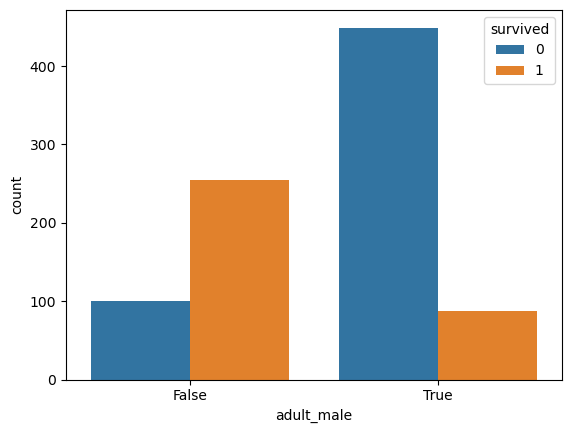

In [60]:
sns.countplot(x=df["adult_male"],hue=df["survived"])

In [61]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True


In [62]:
from sklearn.preprocessing import  OneHotEncoder,OrdinalEncoder

In [63]:
onehot=OneHotEncoder(drop="first",sparse_output=False)

part=onehot.fit_transform(df[["sex","adult_male","embarked"]])
df_part=pd.DataFrame(part,columns=onehot.get_feature_names_out())

In [64]:
df_part.head()

,sex_male,adult_male_True,embarked_Q,embarked_S,embarked_nan
0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0


In [65]:
df=pd.concat([df,df_part],axis=1)

In [66]:
df=df.drop(["sex","adult_male"],axis=1)

<Axes: xlabel='alone', ylabel='count'>

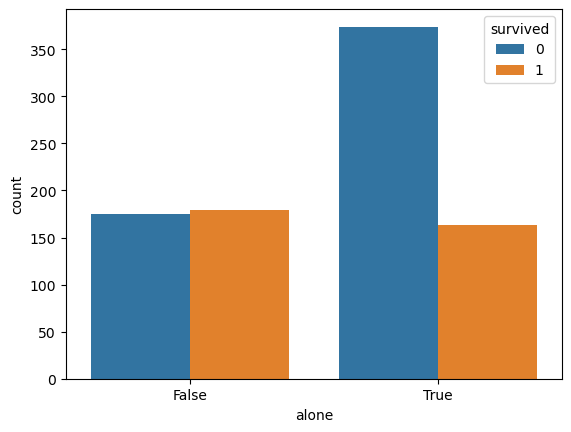

In [67]:
sns.countplot(x=df["alone"],hue=df['survived'])

In [68]:
df["alone"]=df["alone"].map({False:0,True:1})

In [69]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [70]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,alone,sex_male,adult_male_True,embarked_Q,embarked_S,embarked_nan
0,0,3,22.0,1,0,7.2500,S,Third,0,1.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,C,First,0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,S,Third,1,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,First,0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,Third,1,1.0,1.0,0.0,1.0,0.0


In [71]:
df.isnull().sum()

survived             0
pclass               0
age                177
sibsp                0
parch                0
fare                 0
embarked             2
class                0
alone                0
sex_male             0
adult_male_True      0
embarked_Q           0
embarked_S           0
embarked_nan         0
dtype: int64

In [72]:
df.shape

(891, 14)

In [73]:
df=df.dropna()

In [74]:
df=df.drop("embarked",axis=1)

In [75]:
df["class"].value_counts()

class
Third     355
First     184
Second    173
Name: count, dtype: int64

In [76]:
ordinal=OrdinalEncoder(categories=[["First","Third","Second"]])

df["class"]=ordinal.fit_transform(df[["class"]])

In [77]:
df.head()

,survived,pclass,age,sibsp,parch,fare,class,alone,sex_male,adult_male_True,embarked_Q,embarked_S,embarked_nan
0,0,3,22.0,1,0,7.2500,1.0,0,1.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,1,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,1,1.0,1.0,0.0,1.0,0.0


<Axes: >

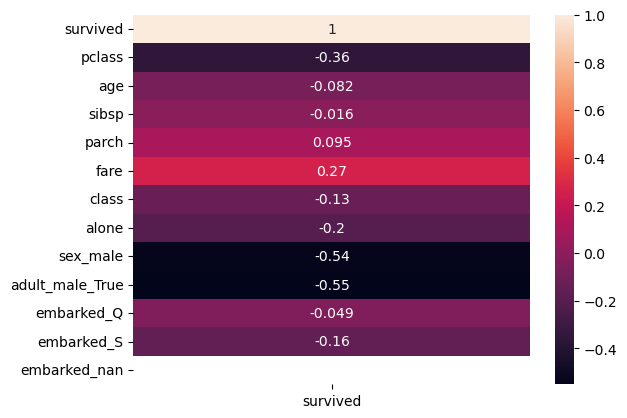

In [80]:
sns.heatmap(df.corr()[["survived"]],annot=True)

In [ ]:
# model=DecisionTreeClassifier()
# x,y=df.drop("survived",axis=1),df["survived"]

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# model.fit(x_train,y_train)

# y_pred=model.predict(x_test)
# acc=accuracy_score(y_test,y_pred)
# print("accuracy is -->",acc)

accuracy is --> 0.7972027972027972


In [82]:
from sklearn.tree import plot_tree
from io import BytesIO
import base64

In [84]:
import matplotlib
matplotlib.use("Agg")



def tree(criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=2):
    x,y=df.drop("survived",axis=1),df["survived"]

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

    # Train-test split

    # Decision Tree model
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        random_state=42
    )

    model.fit(x_train, y_train)
    fn=model.feature_names_in_
    cn=model.classes_
    # Accuracy & Confusion Matrix
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc=round(acc,2)
    matrix = confusion_matrix(y_test, y_pred)

    # Tree depth and node count
    depth = model.get_depth()
    total_nodes = model.tree_.node_count

    # ✅ Generate image in memory (NO FILE SAVING)
    fig = plt.figure(figsize=(10, 7))
    plot_tree(model, filled=True, feature_names=fn, class_names=cn)
    plt.tight_layout()

    # Convert to base64
    buffer = BytesIO()
    fig.savefig(buffer, format="png")
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.getvalue()).decode()

    plt.close(fig)

    return acc, img_base64, matrix, depth, total_nodes